# Audio Based Crime Detection

##### Proyek ini bertujuan untuk mengatasi masalah kejahatan di lingkungan seperti pencurian, penculikan, dan lain sebagainya dengan cara menganalisis suara. Dengan memanfaatkan sinyal audio, sistem ini bertujuan untuk mengidentifikasi dan mengklasifikasikan berbagai tindak kegiatan kriminal. Sistem dilatih menggunakan dataset audio untuk mendeteksi tindak kriminal. Melalui pengolahan sinyal dan algoritma pembelajaran mesin, proyek ini bertujuan untuk mendeteksi dan mencegah kejadian kriminal, sehingga menciptakan lingkungan yang lebih aman dan terjamin.

In [2]:
import os
import librosa
import numpy as np
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
# from tensorflow.keras.models import load_model

#impor 

# Audio Data Preprocessing

##### Kami memilih dataset audio dari Kaggle karena memiliki berbagai kategori sampel audio yang banyak, serta ukurannya yang lebih kecil dibandingkan dataset lainnya.

### Proses Pengolahan Dataset
##### 1. Langkah pertama adalah memilih dataset audio yang sesuai dari Kaggle. Dataset ini harus mencakup berbagai kategori sampel audio dan memiliki ukuran yang cukup kecil untuk keperluan pengujian. 
#### 2. Dataset audio kemudian dipreproses untuk mempersiapkannya untuk analisis lebih lanjut. Langkah ini dilakukan dengan cara melakukan penghapusan noise. Nantinya fitur-fitur audio yang relevan diekstraksi dari setiap sampel audio. Ini dapat mencakup fitur-fitur seperti spektrum energi, MFCC (Mel-Frequency Cepstral Coefficients), atau fitur-fitur lain yang dapat membedakan antara berbagai jenis suara. 
#### 3. Model Convolutional Neural Network (CNN), dibangun untuk mengklasifikasikan sampel audio ke dalam kategori yang sesuai. Model ini dilatih menggunakan dataset yang telah dipreproses dan diekstraksi fiturnya.
#### 4. Model yang telah dibuat kemudian divalidasi menggunakan dataset uji yang terpisah. Ini dilakukan untuk memastikan bahwa model dapat mengeneralisasi dengan baik pada data baru yang tidak pernah dilihat sebelumnya. 
#### 5. Terakhir, model dioptimalkan menggunakan teknik-teknik seperti tuning parameter untuk meningkatkan akurasi dan kinerja model secara keseluruhan.

#### Relasi antar fitur dianalisa menggunakan metode multivariate analysis untuk mencari hubungan fitur terhadap tindak kriminal di lingkungan. Dilakukan training terhadap data yang sudah di proses, hasil berupa indikasi bahwa audio termasuk kategori tindak kriminal, atau bukan. Evaluasi juga dilakukan untuk memastikan bahwa hasil keluaran dari model valid dan dapat dipertanggungjawabkan.


In [ ]:
#buat data audio jadi digital trs simpan ke csv

data_dir = r'C:\kuliah\semester 6\ilmu data 1\Proyek deteksi teriak\data_paper\Raw Audio'
classes = ['scream', 'non_scream']


def load_and_preprocess_data(data_dir, classes, target_shape=(128, 128)):
    mel_data = []
    zcr_data = []
    labels = []

    for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                audio_data, sample_rate = librosa.load(file_path, sr=None)
                # Perform preprocessing (e.g., convert to Mel spectrogram and resize)
                mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
                mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
                mel_data.append(mel_spectrogram)
                
                # Calculate ZCR
                zcr = librosa.feature.zero_crossing_rate(y=audio_data)
                zcr = resize(np.expand_dims(zcr, axis=-1), target_shape)
                zcr_data.append(zcr)

                labels.append(class_name)

    return np.array(mel_data), np.array(zcr_data), np.array(labels)


data, zcr_data, labels = load_and_preprocess_data(data_dir, classes)

# Save Mel spectrogram data to a file
np.save('mel_data.npy', data)

# Save ZCR data to a file
np.save('zcr_data.npy', zcr_data)

# Save labels to a file
np.savetxt('labels.csv', labels, fmt='%s')




In [4]:
#jalankan kode dari sini, tidak usah buat baca ulang data audio 600mb lebih
# Load data and labels from CSV files
#bisa dibuat jadi pipeline
from sklearn.preprocessing import LabelEncoder
data = np.load('mel_data.npy')
labels = np.loadtxt('labels.csv', dtype=str)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

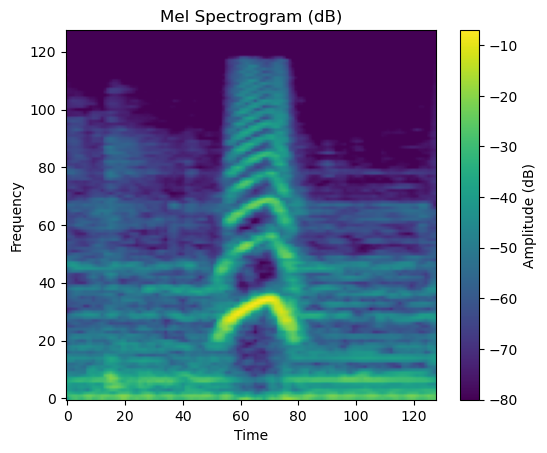

(128, 128, 1)
(1,)


In [57]:
# Apply power_to_db to Mel spectrogram data
mel_data_db = librosa.power_to_db(data, ref=np.max)

# Display Mel spectrogram data as an image
plt.imshow(mel_data_db[0][:, :, 0], cmap='viridis', origin='lower')
plt.title('Mel Spectrogram (dB)')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(label='Amplitude (dB)')
plt.show()

print(mel_data_db[0].shape)
print(mel_data_db[0][0, 0, :].shape)

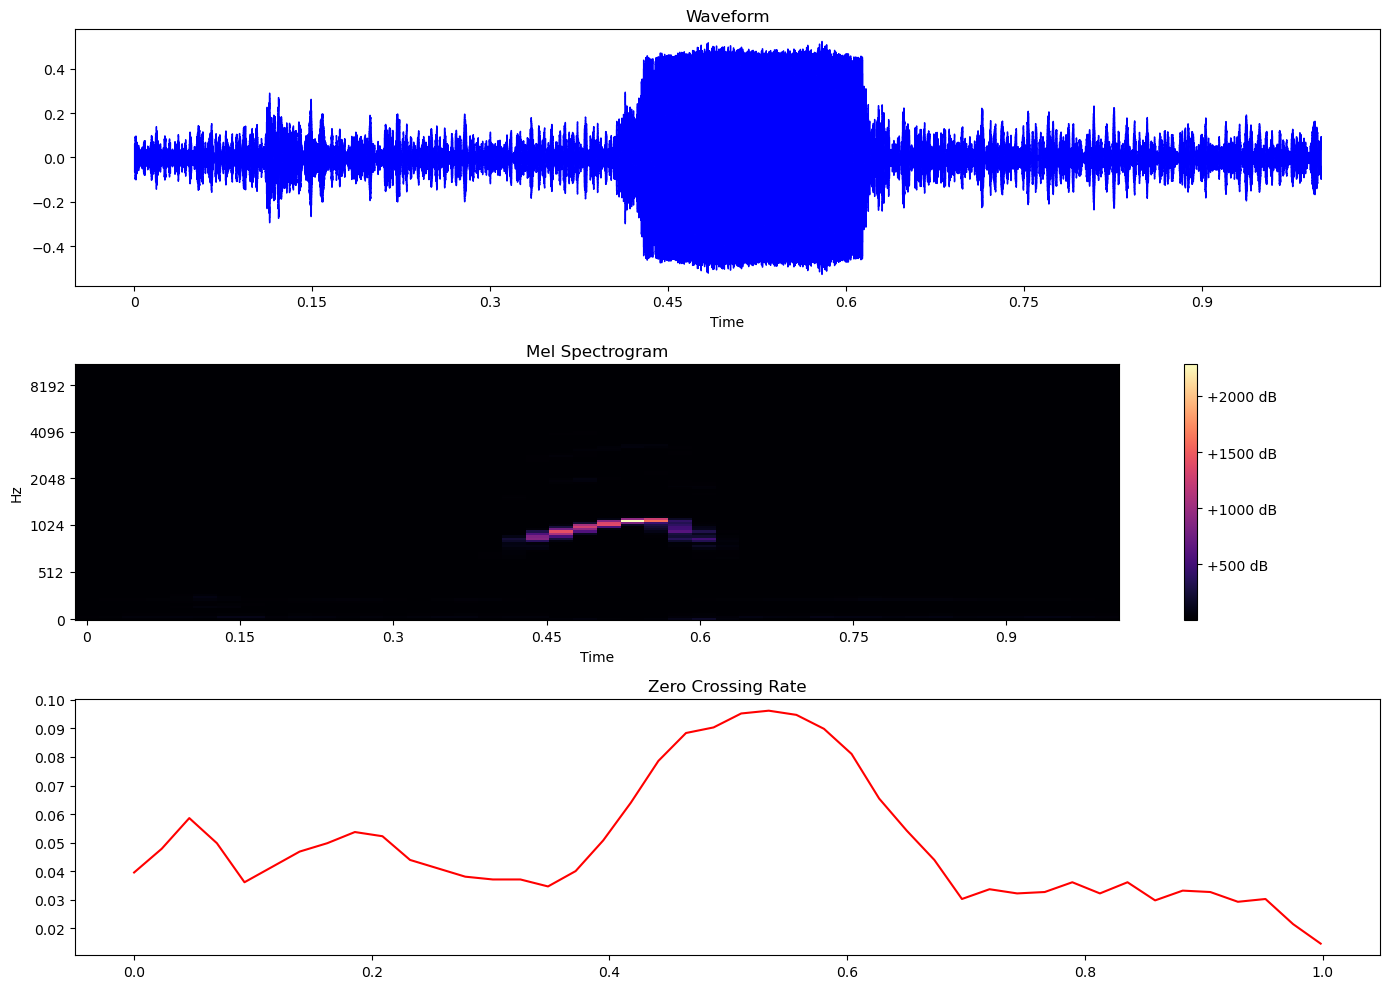

[[0.03955078 0.04785156 0.05859375 0.04980469 0.03613281 0.04150391
  0.046875   0.04980469 0.05371094 0.05224609 0.04394531 0.04101562
  0.03808594 0.03710938 0.03710938 0.03466797 0.04003906 0.05078125
  0.06396484 0.07861328 0.08837891 0.09033203 0.09521484 0.09619141
  0.09472656 0.08984375 0.08105469 0.06542969 0.05419922 0.04394531
  0.03027344 0.03369141 0.03222656 0.03271484 0.03613281 0.03222656
  0.03613281 0.02978516 0.03320312 0.03271484 0.02929688 0.03027344
  0.02148438 0.01464844]]
(128, 44)


In [3]:


file_path = '0-0.wav' 

x , sr = librosa.load(file_path)
# Calculate Mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=x, sr=sr)

# Calculate Zero Crossing Rate (ZCR)
zcr = librosa.feature.zero_crossing_rate(y=x)

# Plot waveform, Mel spectrogram, and ZCR
plt.figure(figsize=(14, 10))

# Plot waveform
plt.subplot(3, 1, 1)
librosa.display.waveshow(x, sr=sr, color="blue")
plt.title('Waveform')

# Plot Mel spectrogram
plt.subplot(3, 1, 2)
librosa.display.specshow(mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')

# Plot ZCR
plt.subplot(3, 1, 3)
plt.plot(librosa.times_like(zcr), zcr[0], color='r')
plt.title('Zero Crossing Rate')

plt.tight_layout()
plt.show()
print(zcr)
print(mel_spectrogram.shape)

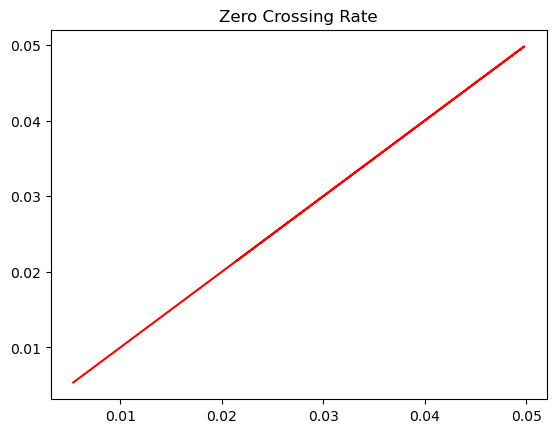

[[[0.02148438]
  [0.0268116 ]
  [0.03426743]
  ...
  [0.01210785]
  [0.0086689 ]
  [0.00537109]]

 [[0.02148438]
  [0.0268116 ]
  [0.03426743]
  ...
  [0.01210785]
  [0.0086689 ]
  [0.00537109]]

 [[0.02148438]
  [0.0268116 ]
  [0.03426743]
  ...
  [0.01210785]
  [0.0086689 ]
  [0.00537109]]

 ...

 [[0.02148438]
  [0.0268116 ]
  [0.03426743]
  ...
  [0.01210785]
  [0.0086689 ]
  [0.00537109]]

 [[0.02148438]
  [0.0268116 ]
  [0.03426743]
  ...
  [0.01210785]
  [0.0086689 ]
  [0.00537109]]

 [[0.02148438]
  [0.0268116 ]
  [0.03426743]
  ...
  [0.01210785]
  [0.0086689 ]
  [0.00537109]]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load Mel spectrogram data from file
zcr_data = np.load('zcr_data.npy')

# Display Mel spectrogram data as an image
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Load ZCR data from file
zcr_data = np.load('zcr_data.npy')

# # Compute time axis for plotting
# times = librosa.times_like(zcr_data[0][0])

# # Plot the ZCR data
# plt.plot(times, zcr_data[0][0], color='r')
# plt.plot(librosa.times_like(zcr), zcr[0], color='r')
# plt.title('Zero-Crossing Rate (ZCR)')
# plt.xlabel('Time (s)')
# plt.ylabel('ZCR')
# plt.grid(True)
# plt.show()

# plt.imshow(zcr_data[0][:, :, :], cmap='viridis', origin='lower')
# plt.title('zcr Spectrogram')
# plt.xlabel('Time')
# plt.ylabel('Frequency')
# plt.colorbar(label='Amplitude')
plt.plot(np.squeeze(zcr_data[0][0]), np.squeeze(zcr_data[0][1]), color='r')
plt.title('Zero Crossing Rate')
plt.show()
# for i in range(len(zcr_data[0])):
#     print(zcr_data[0][i])
print(zcr_data[0])
np.savetxt('zcr[0].csv', np.squeeze(zcr_data[0]), delimiter=',')


In [51]:
target_shape = (128,128)
audio_data, sample_rate = librosa.load('0-0.wav', sr=None)
# Perform preprocessing (e.g., convert to Mel spectrogram and resize)
mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
print(mel_spectrogram.shape)
mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
print(mel_spectrogram.shape)
# Calculate ZCR
zcr = librosa.feature.zero_crossing_rate(y=audio_data)
print(zcr.shape)
zcr = resize(np.expand_dims(zcr, axis=-1), target_shape)
print(zcr.shape)

(128, 87)
(128, 128, 1)
(1, 87)
(128, 128, 1)


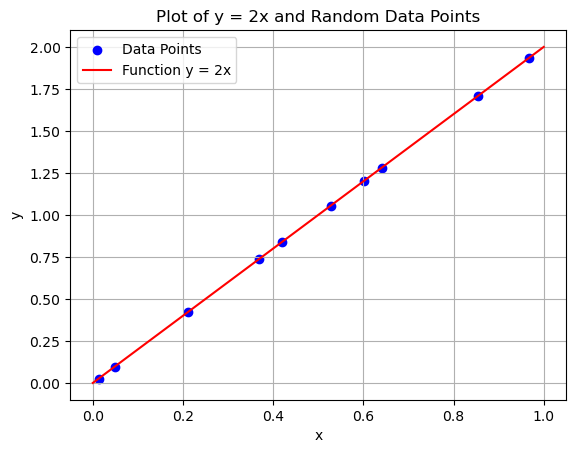

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function y = 2x
def func(x):
    return 2 * x

# Generate 10 random x values
x_values = np.random.rand(10)

# Calculate corresponding y values using the function
y_values = func(x_values)

# Plot the points
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Plot the function y = 2x
x_range = np.linspace(0, 1, 100)  # Generate a range of x values
plt.plot(x_range, func(x_range), color='red', label='Function y = 2x')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = 2x and Random Data Points')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [22]:
# Load data and labels from CSV files
from sklearn.preprocessing import LabelEncoder

# Print original labels before encoding
print("Original labels:")
print(labels[0], labels[-1])

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Print encoded labels
print("Encoded labels:")
print(labels_encoded[0], labels_encoded[-1])

# Split data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)

# Convert integer labels to one-hot encoding
num_classes = len(classes)
y_train = to_categorical(y_train_encoded, num_classes=num_classes)
y_test = to_categorical(y_test_encoded, num_classes=num_classes)


Original labels:
scream non_scream
Encoded labels:
1 0


In [23]:
print(data.shape)

(869, 128, 128, 1)


In [24]:
#Algoritma pertama, coba buat dengan cnn untuk baca grafik mel spectogram
input_shape = X_train[0].shape
input_layer = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output_layer = Dense(len(classes), activation='softmax')(x)
model = Model(input_layer, output_layer)

# Step 5: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
22/22 [==============================] - 5s 195ms/step - loss: 13.5048 - accuracy: 0.7914 - val_loss: 0.3905 - val_accuracy: 0.9655
Epoch 2/30
22/22 [==============================] - 4s 169ms/step - loss: 0.1545 - accuracy: 0.9827 - val_loss: 0.0958 - val_accuracy: 0.9828
Epoch 3/30
22/22 [==============================] - 4s 172ms/step - loss: 0.0347 - accuracy: 0.9928 - val_loss: 0.1027 - val_accuracy: 0.9828
Epoch 4/30
22/22 [==============================] - 4s 186ms/step - loss: 0.0484 - accuracy: 0.9928 - val_loss: 0.1689 - val_accuracy: 0.9770
Epoch 5/30
22/22 [==============================] - 4s 198ms/step - loss: 0.0175 - accuracy: 0.9928 - val_loss: 0.0989 - val_accuracy: 0.9885
Epoch 6/30
22/22 [==============================] - 4s 181ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0699 - val_accuracy: 0.9885
Epoch 7/30
22/22 [==============================] - 4s 164ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0720 - val_accuracy: 0.9885
Epoch

In [26]:
from sklearn.metrics import classification_report

# Map class indices to class labels
class_labels = {0: 'non_scream', 1: 'scream'}

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_classes = np.argmax(y_test, axis=1)

# Generate classification report with class labels
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=[class_labels[i] for i in range(len(class_labels))]))

# Save the model
model.save('cnn_model.h5')


Test Accuracy: 0.982758641242981
6/6 [==============================] - 0s 38ms/step
Classification Report:
              precision    recall  f1-score   support

  non_scream       0.99      0.98      0.99       112
      scream       0.97      0.98      0.98        62

    accuracy                           0.98       174
   macro avg       0.98      0.98      0.98       174
weighted avg       0.98      0.98      0.98       174



### Logistic regression

#### Regresi logistik dilakukan untuk mencari hubungan antar dua fitur, yaitu Mel-Frequency Cepstral Coefficients (mel_data) dan fitur Zero Crossing Rate (zcr_data). Selanjutnya, label-label untuk setiap sampel audio dimuat dari file CSV. Setelah itu, data dan label yang telah dimuat dibagi menjadi set pelatihan dan pengujian menggunakan metode pembagian data dari modul sklearn.model_selection. Proses ini memungkinkan pembangunan model yang akan datang dilakukan dengan menggunakan data pelatihan serta label-label yang sesuai, sementara data pengujian digunakan untuk menguji performa model yang telah dibangun.

In [27]:
#jalankan kode dari sini, tidak usah buat baca ulang data audio 600mb lebih
# Load data and labels from CSV files
from sklearn.preprocessing import LabelEncoder
mel_data = np.load('mel_data.npy')
zcr_data = np.load('zcr_data.npy')
labels = np.loadtxt('labels.csv', dtype=str)
# Split data into training and testing sets

In [49]:
#bisa diubah jadi pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load Mel spectrogram data, ZCR data, and labels
mel_data = np.load('mel_data.npy')
zcr_data = np.load('zcr_data.npy')
labels = np.loadtxt('labels.csv', dtype=str)

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Flatten Mel spectrogram data and ZCR data
mel_data_flat = mel_data.reshape(mel_data.shape[0], -1)
zcr_data_flat = zcr_data.reshape(zcr_data.shape[0], -1)

# Combine flattened Mel spectrogram data and ZCR data
X_combined_flat = np.concatenate((mel_data_flat, zcr_data_flat), axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined_flat, labels_encoded, test_size=0.2, random_state=42)

In [36]:


# Create and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict labels for testing set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.9712643678160919
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       112
           1       0.97      0.95      0.96        62

    accuracy                           0.97       174
   macro avg       0.97      0.97      0.97       174
weighted avg       0.97      0.97      0.97       174



C:\ProgramData\anaconda3\envs\PythonIlmuData1\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from joblib import dump, load

# Define the filename for saving the model
logistic_model_filename = 'logistic_regression_model.joblib'

# Save the logistic regression model to a file
dump(log_reg, logistic_model_filename)


['logistic_regression_model.joblib']

In [ ]:
'''
#Kalau mau load model biar tidak train ulang
from joblib import load

# Load the saved model from file
loaded_model = load('svm_model.joblib')

# Now you can use the loaded model for predictions
'''

### Support Vector Machine (SVM)

#### SVM bertujuan untuk memisahkan titik data ke dalam kelas-kelas yang berbeda dengan mencari hyperplane terbaik yang memaksimalkan margin antara kelas-kelas tersebut. Dalam kode ini, SVM digunakan untuk melakukan klasifikasi terhadap data audio yang telah diproses sebelumnya. Langkah pertama adalah menentukan parameter-parameter yang optimal untuk model SVM menggunakan metode grid search, yang mencoba berbagai kombinasi parameter dan memilih yang terbaik berdasarkan performa model pada data pengujian. Parameter-parameter yang diuji meliputi jenis kernel (linear, polynomial, radial basis function, sigmoid) dan parameter C yang mengatur tingkat kompleksitas model. Setelah proses grid search selesai, model SVM dengan parameter terbaik dipilih dan dilatih menggunakan data pelatihan (X_train dan y_train). Hasil dari grid search, berupa parameter terbaik, dicetak ke layar untuk informasi selanjutnya. Dengan menggunakan pendekatan ini, diharapkan bahwa model SVM yang dihasilkan dapat memberikan klasifikasi yang akurat terhadap data audio yang baru.

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Reshape the input data for SVM
# X_train_flattened = X_train.reshape(X_train.shape[0], -1)
# X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Define the parameter grid for grid search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100]
}

# Initialize SVM model
svm_model = SVC()

# Perform grid search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)




Best parameters: {'C': 100, 'kernel': 'rbf'}


### Evaluasi Model

#### Setelah menemukan parameter terbaik untuk model SVM menggunakan grid search, langkah selanjutnya adalah mengevaluasi model SVM dengan parameter terbaik tersebut menggunakan data pengujian yang telah dipisahkan sebelumnya. Model SVM dengan parameter terbaik dibuat menggunakan nilai-nilai parameter terbaik yang telah ditentukan sebelumnya. 

#### Model ini kemudian dilatih menggunakan data pelatihan (X_train dan y_train) menggunakan metode .fit(). Setelah model dilatih, prediksi dilakukan pada data pengujian (X_test) menggunakan metode .predict(). Setelah mendapatkan prediksi, akurasi model dihitung menggunakan metrik akurasi (accuracy_score) untuk membandingkan prediksi dengan label sebenarnya (y_test). Selain itu, laporan klasifikasi juga dicetak menggunakan metode classification_report, yang memberikan informasi lebih detail tentang performa model seperti presisi, recall, dan F1-score untuk setiap kelas. Data diakhiri dengan mencetak akurasi pengujian dan laporan klasifikasi untuk dinilai performa model SVM yang telah dilatih menggunakan parameter terbaik pada dataset pengujian.

In [47]:
# Evaluate the model with best parameters
best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train, y_train)
y_pred = best_svm_model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(y_test, y_pred, target_names=classes))

Test Accuracy: 0.9712643678160919
              precision    recall  f1-score   support

      scream       0.98      0.97      0.98       112
  non_scream       0.95      0.97      0.96        62

    accuracy                           0.97       174
   macro avg       0.97      0.97      0.97       174
weighted avg       0.97      0.97      0.97       174



In [ ]:
from joblib import dump

# Define the filename for saving the model
model_filename = 'svm_model.joblib'

# Save the model to a file
dump(best_svm_model, model_filename)

In [52]:
from sklearn.metrics import classification_report
from joblib import load
from keras.models import load_model
#jalankan kode dari sini, tidak usah buat baca ulang data audio 600mb lebih
# Load data and labels from CSV files
from sklearn.preprocessing import LabelEncoder
data = np.load('mel_data.npy')
labels = np.loadtxt('labels.csv', dtype=str)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Load data and labels from CSV files
from sklearn.preprocessing import LabelEncoder

# Print original labels before encoding
print("Original labels:")
print(labels[0], labels[-1])

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Print encoded labels
print("Encoded labels:")
print(labels_encoded[0], labels_encoded[-1])

# Split data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)

# Convert integer labels to one-hot encoding
num_classes = len(classes)
y_train = to_categorical(y_train_encoded, num_classes=num_classes)
y_test = to_categorical(y_test_encoded, num_classes=num_classes)


# Load the saved model from file
model = load_model('cnn_model.h5')
print('CNN model')
# Map class indices to class labels
class_labels = {0: 'non_scream', 1: 'scream'}

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_classes = np.argmax(y_test, axis=1)

# Generate classification report with class labels
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=[class_labels[i] for i in range(len(class_labels))]))



Original labels:
scream non_scream
Encoded labels:
1 0
CNN model
Test Accuracy: 0.982758641242981
6/6 [==============================] - 0s 36ms/step
Classification Report:
              precision    recall  f1-score   support

  non_scream       0.99      0.98      0.99       112
      scream       0.97      0.98      0.98        62

    accuracy                           0.98       174
   macro avg       0.98      0.98      0.98       174
weighted avg       0.98      0.98      0.98       174



#### Kode ini bertujuan untuk mengevaluasi model jaringan saraf tiruan (CNN) yang telah dilatih sebelumnya untuk klasifikasi suara "scream" dan "non_scream". Langkah pertama adalah memuat data fitur audio (mel_data) dan label-labelnya dari file numpy dan CSV yang sesuai. Selanjutnya, label-label asli diubah menjadi representasi angka menggunakan LabelEncoder untuk persiapan pelatihan model. Setelah itu, data dibagi menjadi set pelatihan dan pengujian menggunakan metode train_test_split. 

#### Selanjutnya, label-label yang diubah menjadi angka digunakan untuk membuat representasi one-hot encoding untuk kelas-kelas yang bersangkutan menggunakan to_categorical. Model CNN yang telah dilatih sebelumnya, disimpan dalam file 'cnn_model.h5', kemudian dimuat kembali menggunakan load_model dari Keras. Setelah itu, model dievaluasi pada dataset pengujian untuk mengukur akurasi dan performa model menggunakan metode .evaluate(). Prediksi dilakukan pada dataset pengujian menggunakan model yang telah dimuat kembali, dan hasil prediksi diubah menjadi kelas-kelas yang sesuai menggunakan np.argmax. Selanjutnya, metode classification_report dari sklearn.metrics digunakan untuk menghasilkan laporan klasifikasi yang mencakup metrik-metrik seperti presisi, recall, dan F1-score untuk setiap kelas. Hasil akhirnya mencetak akurasi pengujian dan laporan klasifikasi untuk mengevaluasi performa model CNN yang telah dilatih sebelumnya pada dataset pengujian.

In [54]:

# Load Mel spectrogram data, ZCR data, and labels
mel_data = np.load('mel_data.npy')
zcr_data = np.load('zcr_data.npy')
labels = np.loadtxt('labels.csv', dtype=str)

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Flatten Mel spectrogram data and ZCR data
mel_data_flat = mel_data.reshape(mel_data.shape[0], -1)
zcr_data_flat = zcr_data.reshape(zcr_data.shape[0], -1)

# Combine flattened Mel spectrogram data and ZCR data
X_combined_flat = np.concatenate((mel_data_flat, zcr_data_flat), axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined_flat, labels_encoded, test_size=0.2, random_state=42)
log_reg = load('logistic_regression_model.joblib')
print('Logistic regression model')

# Predict labels for testing set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Logistic regression model
Test Accuracy: 0.9712643678160919
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       112
           1       0.97      0.95      0.96        62

    accuracy                           0.97       174
   macro avg       0.97      0.97      0.97       174
weighted avg       0.97      0.97      0.97       174



In [56]:
# Evaluate the model with best parameters
best_svm_model = load('svm_model.joblib')
y_pred = best_svm_model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(y_test, y_pred, target_names=classes))

Test Accuracy: 0.9712643678160919
              precision    recall  f1-score   support

      scream       0.98      0.97      0.98       112
  non_scream       0.95      0.97      0.96        62

    accuracy                           0.97       174
   macro avg       0.97      0.97      0.97       174
weighted avg       0.97      0.97      0.97       174



### Kesimpulan 

#### Proyek ini telah berhasil mengembangkan sebuah model klasifikasi menggunakan jaringan saraf tiruan (CNN) untuk mendeteksi kejahatan dari suara dengan tingkat akurasi mencapai 97%. Melalui proses analisis audio dan pembangunan model yang cermat, kita telah berhasil menghasilkan sebuah sistem yang mampu mengenali pola suara yang berkaitan dengan kejahatan dengan sangat baik. Tingkat akurasi yang tinggi ini menunjukkan bahwa model yang telah dikembangkan mampu memberikan hasil prediksi yang konsisten dan dapat diandalkan. Dengan demikian, proyek ini memberikan kontribusi yang signifikan dalam upaya meningkatkan keamanan dan ketertiban masyarakat dengan memanfaatkan teknologi analisis suara secara efektif. Dengan hasil yang menjanjikan ini, proyek ini memiliki potensi untuk diterapkan dalam berbagai konteks pengawasan keamanan dan penegakan hukum.